**Crime Prediction**

Import

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [100]:
df = pd.read_csv('./crime.csv', encoding='ISO-8859-1')
df.head()

incident_id        offense_id  OFFENSE_CODE  OFFENSE_CODE_EXTENSION  \
0   2017421909  2017421909299900          2999                       0   
1   2017342682  2017342682299900          2999                       0   
2   2017421829  2017421829299900          2999                       0   
3   2017342681  2017342681299900          2999                       0   
4   2017448789  2017448789299900          2999                       0   

           OFFENSE_TYPE_ID OFFENSE_CATEGORY_ID FIRST_OCCURRENCE_DATE  \
0  criminal-mischief-other     public-disorder  6/25/2017 8:40:00 PM   
1  criminal-mischief-other     public-disorder  5/26/2017 7:00:00 PM   
2  criminal-mischief-other     public-disorder  6/27/2017 4:40:00 PM   
3  criminal-mischief-other     public-disorder  5/26/2017 7:01:00 PM   
4  criminal-mischief-other     public-disorder   7/7/2017 9:48:00 PM   

  LAST_OCCURRENCE_DATE          REPORTED_DATE      INCIDENT_ADDRESS  \
0                  NaN   6/27/2017 7:01:00 PM       2920 W 32ND AVE   
1                  NaN  5/26/2017 11:04:00 PM    13400 E ALBROOK DR   
2                  NaN   6/27/2017 5:50:00 PM    1600 BLOCK 16TH ST   
3                  NaN  5/26/2017 10:21:00 PM  2200 BLOCK MARKET ST   
4                  NaN    7/7/2017 9:48:00 PM       1733 N GROVE ST   

       GEO_X      GEO_Y     GEO_LON    GEO_LAT DISTRICT_ID  PRECINCT_ID  \
0  3133773.0  1702660.0 -105.024167  39.761646           1          113   
1  3185904.0  1709037.0 -104.838576  39.778256           5          521   
2  3140436.0  1699005.0 -105.000538  39.751514           6          612   
3  3143338.0  1700561.0 -104.990186  39.755741           6          612   
4  3132994.0  1696487.0 -105.027052  39.744711           1          121   

  NEIGHBORHOOD_ID  IS_CRIME  IS_TRAFFIC  VICTIM_COUNT  
0        highland         1           0             1  
1       montbello         1           0             1  
2   union-station         1           0             1  
3     five-points         1           0             1  
4     west-colfax         1           0             1

In [101]:
df['OFFENSE_CATEGORY_ID'].value_counts()

theft-from-motor-vehicle        58213
public-disorder                 58122
all-other-crimes                56362
larceny                         55591
auto-theft                      48034
burglary                        27099
other-crimes-against-persons    26115
drug-alcohol                    25316
aggravated-assault              16869
robbery                          7103
white-collar-crime               6984
sexual-assault                   4883
arson                             845
murder                            415
Name: OFFENSE_CATEGORY_ID, dtype: int64

Feature Engineering

In [34]:
crime_categories = df['OFFENSE_CATEGORY_ID'].value_counts()
crime_categories

theft-from-motor-vehicle        58213
public-disorder                 58122
all-other-crimes                56362
larceny                         55591
auto-theft                      48034
burglary                        27099
other-crimes-against-persons    26115
drug-alcohol                    25316
aggravated-assault              16869
robbery                          7103
white-collar-crime               6984
sexual-assault                   4883
arson                             845
murder                            415
Name: OFFENSE_CATEGORY_ID, dtype: int64

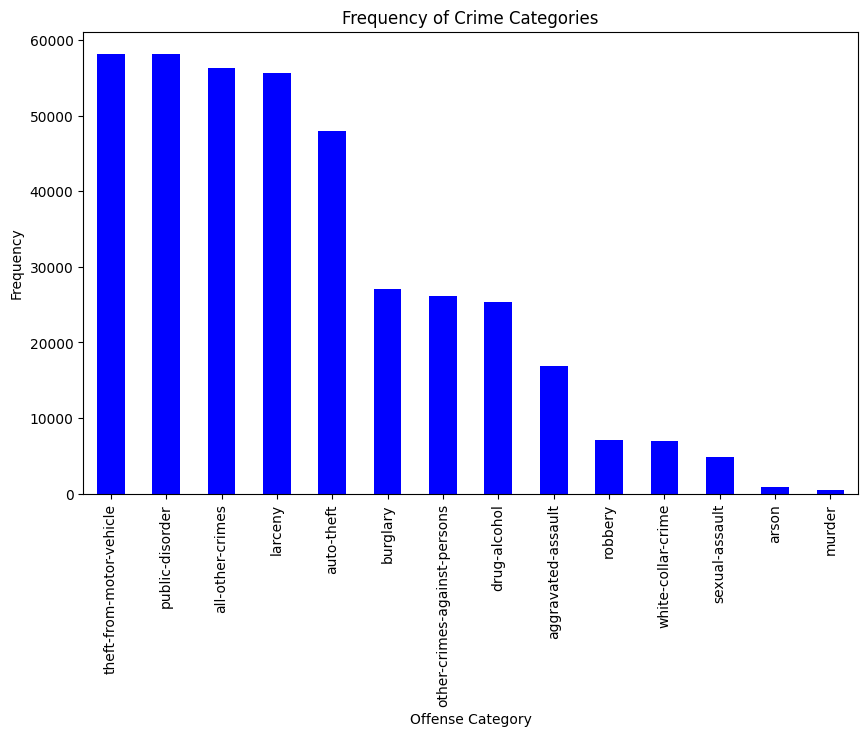

In [35]:
crime_categories.plot(kind='bar', figsize=(10,6), color='blue')
plt.xlabel("Offense Category")
plt.ylabel("Frequency")
plt.title("Frequency of Crime Categories")
plt.show()

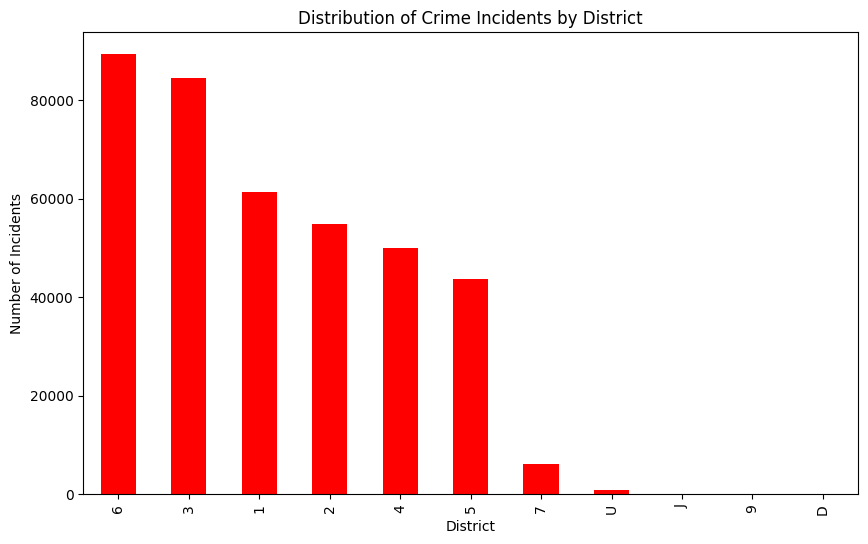

In [36]:
# Plot the distribution of crime incidents by district
districts = df['DISTRICT_ID'].value_counts()
districts.plot(kind='bar', figsize=(10,6), color='red')
plt.xlabel("District")
plt.ylabel("Number of Incidents")
plt.title("Distribution of Crime Incidents by District")
plt.show()

In [102]:
df['FIRST_OCCURRENCE_DATE'] = pd.to_datetime(df['FIRST_OCCURRENCE_DATE'])

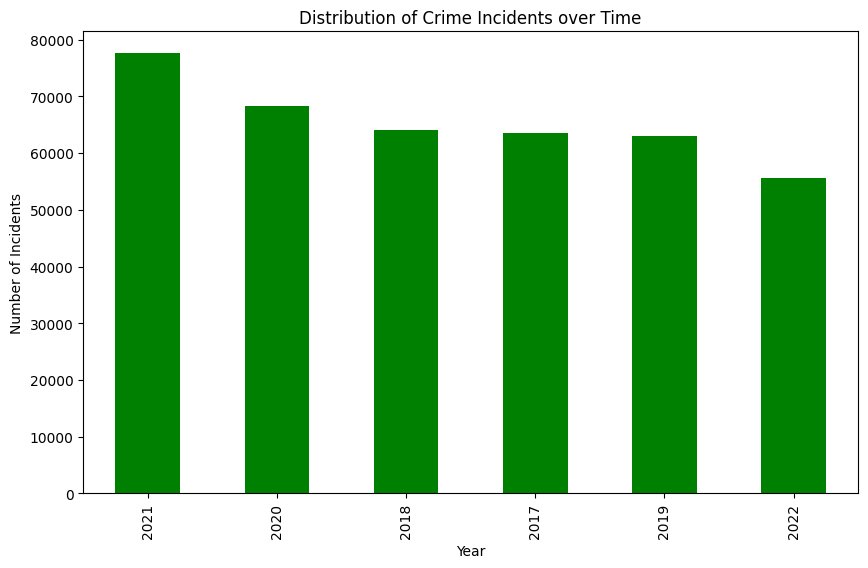

In [103]:
# Plot the distribution of crime incidents over time

df['year'] = df['FIRST_OCCURRENCE_DATE'].dt.year

incidents_by_year = df['year'].value_counts()
incidents_by_year.plot(kind='bar', figsize=(10,6), color='green')
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.title("Distribution of Crime Incidents over Time")
plt.show()

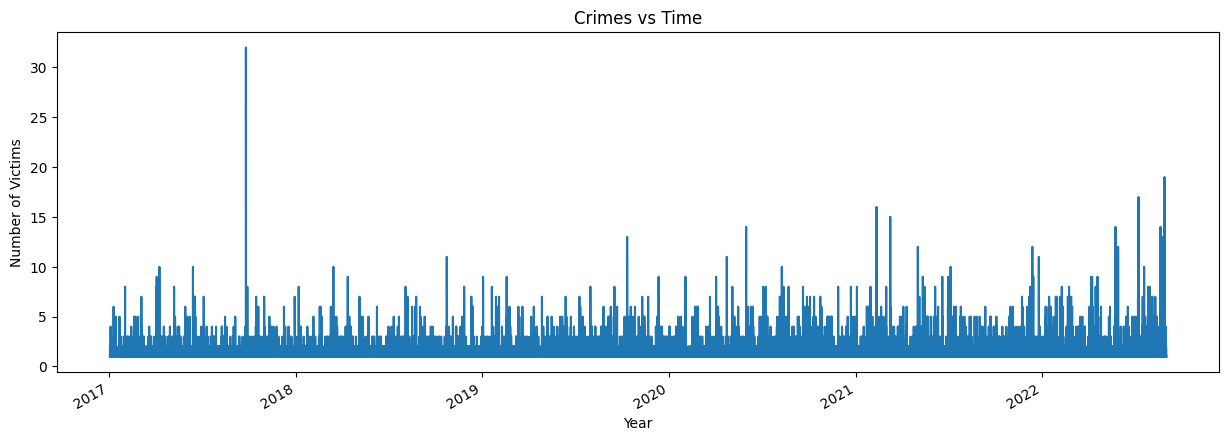

In [104]:
df['FIRST_OCCURRENCE_DATE'] = pd.to_datetime(df['FIRST_OCCURRENCE_DATE'])
df.set_index('FIRST_OCCURRENCE_DATE', inplace=True)
df.sort_index(inplace=True)

plt.figure(figsize=(15, 5))
df['VICTIM_COUNT'].plot()
plt.title("Crimes vs Time")
plt.xlabel("Year")
plt.ylabel("Number of Victims")
plt.show()


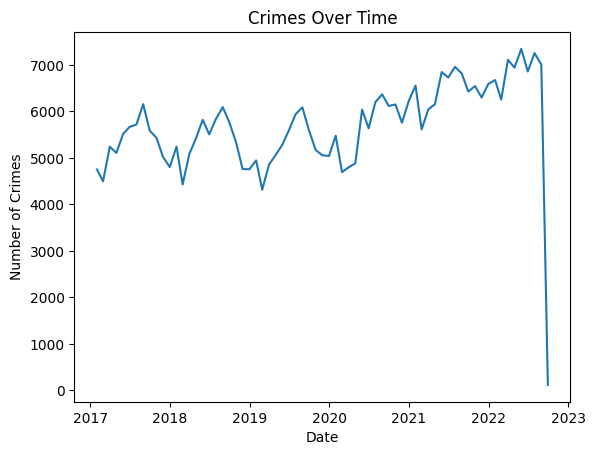

In [105]:
# Resample the data to show the number of crimes per month
monthly_crimes = df.resample('M').count()

# Plot the number of crimes per month
plt.plot(monthly_crimes['incident_id'])
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.title('Crimes Over Time')
plt.show()

In [116]:
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder
le = LabelEncoder()

In [120]:
encoded_col = le.fit_transform(df['OFFENSE_CATEGORY_ID'])
encoded_values = dict(zip(le.classes_, le.transform(le.classes_)))
print(encoded_values)

{'aggravated-assault': 0, 'all-other-crimes': 1, 'arson': 2, 'auto-theft': 3, 'burglary': 4, 'drug-alcohol': 5, 'larceny': 6, 'murder': 7, 'other-crimes-against-persons': 8, 'public-disorder': 9, 'robbery': 10, 'sexual-assault': 11, 'theft-from-motor-vehicle': 12, 'white-collar-crime': 13}


In [121]:
# Transform the column to numeric
df['OFFENSE_CATEGORY_ID_ENCODED'] = encoded_col
df

incident_id         offense_id  OFFENSE_CODE  \
FIRST_OCCURRENCE_DATE                                                 
2019-05-02 23:55:00     2019275381   2019275381131502          1315   
2019-04-03 17:00:00     2019207578   2019207578131501          1315   
2021-01-21 02:48:00      202140458    202140458131500          1315   
2020-02-19 20:06:00     2020109277   2020109277131500          1315   
2017-10-20 15:40:00     2017705359   2017705359131502          1315   
...                            ...                ...           ...   
2018-01-02 09:10:00    20186000556  20186000556279900          2799   
2018-01-02 08:00:00       20185648     20185648250100          2501   
2018-01-02 08:00:00     2018201765   2018201765260900          2609   
2019-07-03 10:00:00     2019455461   2019455461250100          2501   
2020-02-01 00:01:00     2022340969   2022340969250100          2501   

                       OFFENSE_CODE_EXTENSION           OFFENSE_TYPE_ID  \
FIRST_OCCURRENCE_DATE                                                     
2019-05-02 23:55:00                         2    menacing-felony-w-weap   
2019-04-03 17:00:00                         1     aggravated-assault-dv   
2021-01-21 02:48:00                         0        aggravated-assault   
2020-02-19 20:06:00                         0        aggravated-assault   
2017-10-20 15:40:00                         2    menacing-felony-w-weap   
...                                       ...                       ...   
2018-01-02 09:10:00                         0            theft-embezzle   
2018-01-02 08:00:00                         0            forgery-checks   
2018-01-02 08:00:00                         0  fraud-by-use-of-computer   
2019-07-03 10:00:00                         0            forgery-checks   
2020-02-01 00:01:00                         0            forgery-checks   

                      OFFENSE_CATEGORY_ID  LAST_OCCURRENCE_DATE  \
FIRST_OCCURRENCE_DATE                                             
2019-05-02 23:55:00    aggravated-assault                   NaN   
2019-04-03 17:00:00    aggravated-assault   4/3/2019 5:21:00 PM   
2021-01-21 02:48:00    aggravated-assault                   NaN   
2020-02-19 20:06:00    aggravated-assault                   NaN   
2017-10-20 15:40:00    aggravated-assault                   NaN   
...                                   ...                   ...   
2018-01-02 09:10:00    white-collar-crime  1/17/2018 9:10:00 AM   
2018-01-02 08:00:00    white-collar-crime  1/2/2018 12:00:00 PM   
2018-01-02 08:00:00    white-collar-crime  3/26/2018 1:13:00 PM   
2019-07-03 10:00:00    white-collar-crime                   NaN   
2020-02-01 00:01:00    white-collar-crime  5/31/2022 8:23:00 PM   

                               REPORTED_DATE      INCIDENT_ADDRESS      GEO_X  \
FIRST_OCCURRENCE_DATE                                                           
2019-05-02 23:55:00     5/2/2019 11:59:00 PM    4642 N AUCKLAND CT  3186852.0   
2019-04-03 17:00:00      4/3/2019 5:59:00 PM       303 N HOOKER ST  3132444.0   
2021-01-21 02:48:00     1/21/2021 3:43:00 AM    1776 N BROADWAY ST  3144261.0   
2020-02-19 20:06:00    2/19/2020 11:01:00 PM  5500 BLK N JASPER CT  3195745.0   
2017-10-20 15:40:00    10/20/2017 3:40:00 PM        840 E 14TH AVE  3147074.0   
...                                      ...                   ...        ...   
2018-01-02 09:10:00     1/17/2018 9:23:00 AM     1093 S GAYLORD ST  3151417.0   
2018-01-02 08:00:00      1/3/2018 2:49:00 PM    220 N JOSEPHINE ST  3152448.0   
2018-01-02 08:00:00     3/26/2018 1:13:00 PM      1185 S MONACO ST  3164783.0   
2019-07-03 10:00:00    7/20/2019 12:12:00 PM      1559 S FOREST ST  3161050.0   
2020-02-01 00:01:00     7/5/2022 10:32:00 AM      1024 N LOCUST ST  3164910.0   

                       ...     GEO_LON    GEO_LAT  DISTRICT_ID PRECINCT_ID  \
FIRST_OCCURRENCE_DATE  ...                                                   
2019-05-02 23:55:00    ... -104.835179  3

In [122]:
df.sort_values(inplace=True, by='OFFENSE_CATEGORY_ID_ENCODED', ascending=True)
df

incident_id         offense_id  OFFENSE_CODE  \
FIRST_OCCURRENCE_DATE                                                 
2019-05-02 23:55:00     2019275381   2019275381131502          1315   
2022-05-09 11:57:00     2022232013   2022232013131500          1315   
2019-06-27 16:45:00     2019401612   2019401612131500          1315   
2018-04-06 02:07:00     2018230005   2018230005131500          1315   
2021-08-16 08:30:00     2021469036   2021469036131502          1315   
...                            ...                ...           ...   
2018-05-30 00:00:00     2018366656   2018366656250100          2501   
2021-04-21 11:30:00     2021225994   2021225994260900          2609   
2022-07-08 15:00:00     2022354116   2022354116260500          2605   
2019-03-11 15:00:00    20198016888  20198016888260201          2602   
2020-02-01 00:01:00     2022340969   2022340969250100          2501   

                       OFFENSE_CODE_EXTENSION             OFFENSE_TYPE_ID  \
FIRST_OCCURRENCE_DATE                                                       
2019-05-02 23:55:00                         2      menacing-felony-w-weap   
2022-05-09 11:57:00                         0          aggravated-assault   
2019-06-27 16:45:00                         0          aggravated-assault   
2018-04-06 02:07:00                         0          aggravated-assault   
2021-08-16 08:30:00                         2      menacing-felony-w-weap   
...                                       ...                         ...   
2018-05-30 00:00:00                         0              forgery-checks   
2021-04-21 11:30:00                         0    fraud-by-use-of-computer   
2022-07-08 15:00:00                         0     theft-unauth-use-of-ftd   
2019-03-11 15:00:00                         1  theft-fail-return-rent-veh   
2020-02-01 00:01:00                         0              forgery-checks   

                      OFFENSE_CATEGORY_ID   LAST_OCCURRENCE_DATE  \
FIRST_OCCURRENCE_DATE                                              
2019-05-02 23:55:00    aggravated-assault                    NaN   
2022-05-09 11:57:00    aggravated-assault                    NaN   
2019-06-27 16:45:00    aggravated-assault   6/27/2019 4:55:00 PM   
2018-04-06 02:07:00    aggravated-assault                    NaN   
2021-08-16 08:30:00    aggravated-assault                    NaN   
...                                   ...                    ...   
2018-05-30 00:00:00    white-collar-crime  5/30/2018 11:59:00 PM   
2021-04-21 11:30:00    white-collar-crime   4/21/2021 1:00:00 PM   
2022-07-08 15:00:00    white-collar-crime   7/9/2022 12:00:00 PM   
2019-03-11 15:00:00    white-collar-crime                    NaN   
2020-02-01 00:01:00    white-collar-crime   5/31/2022 8:23:00 PM   

                               REPORTED_DATE             INCIDENT_ADDRESS  \
FIRST_OCCURRENCE_DATE                                                       
2019-05-02 23:55:00     5/2/2019 11:59:00 PM           4642 N AUCKLAND CT   
2022-05-09 11:57:00      5/9/2022 1:04:00 PM        2100 BLOCK LARIMER ST   
2019-06-27 16:45:00     6/27/2019 7:41:00 PM  N BROADWAY ST / CHEYENNE PL   
2018-04-06 02:07:00      4/6/2018 9:20:00 PM       E 6TH AVE / N LOGAN ST   
2021-08-16 08:30:00     8/16/2021 8:34:00 AM  E COLFAX AVE / N DOWNING ST   
...                                      ...                          ...   
2018-05-30 00:00:00    5/31/2018 10:11:00 PM           1301 N SANTA FE DR   
2021-04-21 11:30:00    4/22/2021 10:40:00 AM              1301 W 38TH AVE   
2022-07-08 15:00:00     7/14/2022 3:02:00 PM            1667 N ST PAUL ST   
2019-03-11 15:00:00      4/9/2019 4:32:00 PM             24530 E 78TH AVE   
2020-02-01 00:01:00     7/5/2022 10:32:00 AM             1024 N LOCUST ST   

                           GEO_X  ...     GEO_LON    GEO_LAT  DISTRICT_ID  \
FIRST_OCCURRENCE_DATE             ...                                       
2019-05-02 23:55:00    3186852.0  ... -104.835179  39.78

In [154]:
df_murder = df[(df['OFFENSE_CATEGORY_ID_ENCODED'] == 7) & (df['DISTRICT_ID'] == '6')]
df_robbery = df[(df['OFFENSE_CATEGORY_ID_ENCODED'] == 10) & (df['DISTRICT_ID'] == '6')]
df_sexual_assault = df[(df['OFFENSE_CATEGORY_ID_ENCODED'] == 11) & (df['DISTRICT_ID'] == '6')]
df_arson = df[(df['OFFENSE_CATEGORY_ID_ENCODED'] == 2) & (df['DISTRICT_ID'] == '6')]
# Resample the data to get the count of crimes per month
df_murder = df_murder.resample('M').count()
df_robbery = df_robbery.resample('M').count()
df_sexual_assault = df_sexual_assault.resample('M').count()
df_arson = df_arson.resample('M').count()

df_murder


incident_id  offense_id  OFFENSE_CODE  \
FIRST_OCCURRENCE_DATE                                          
2017-01-31                       1           1             1   
2017-02-28                       1           1             1   
2017-03-31                       1           1             1   
2017-04-30                       1           1             1   
2017-05-31                       2           2             2   
...                            ...         ...           ...   
2022-02-28                       1           1             1   
2022-03-31                       1           1             1   
2022-04-30                       2           2             2   
2022-05-31                       0           0             0   
2022-06-30                       2           2             2   

                       OFFENSE_CODE_EXTENSION  OFFENSE_TYPE_ID  \
FIRST_OCCURRENCE_DATE                                            
2017-01-31                                  1                1   
2017-02-28                                  1                1   
2017-03-31                                  1                1   
2017-04-30                                  1                1   
2017-05-31                                  2                2   
...                                       ...              ...   
2022-02-28                                  1                1   
2022-03-31                                  1                1   
2022-04-30                                  2                2   
2022-05-31                                  0                0   
2022-06-30                                  2                2   

                       OFFENSE_CATEGORY_ID  LAST_OCCURRENCE_DATE  \
FIRST_OCCURRENCE_DATE                                              
2017-01-31                               1                     0   
2017-02-28                               1                     0   
2017-03-31                               1                     0   
2017-04-30                               1                     1   
2017-05-31                               2                     0   
...                                    ...                   ...   
2022-02-28                               1                     0   
2022-03-31                               1                     0   
2022-04-30                               2                     1   
2022-05-31                               0                     0   
2022-06-30                               2                     0   

                       REPORTED_DATE  INCIDENT_ADDRESS  GEO_X  ...  GEO_LON  \
FIRST_OCCURRENCE_DATE                                          ...            
2017-01-31                         1                 1      1  ...        1   
2017-02-28                         1                 1      1  ...        1   
2017-03-31                         1                 1      1  ...        1   
2017-04-30                         1                 1      1  ...        1   
2017-05-31                         2                 2      2  ...        2   
...                              ...               ...    ...  ...      ...   
2022-02-28                         1                 1      1  ...        1   
2022-03-31                         1                 1      1  ...        1   
2022-04-30                         2                 2      2  ...        2   
2022-05-31                         0                 0      0  ...        0   
2022-06-30                         2                 2      2  ...        2   

                       GEO_LAT  DISTRICT_ID  PRECINCT_ID  NEIGHBORHOOD_ID  \
FIRST_OCCURRENCE_DATE                                                       
2017-01-31                   1            1            1                1   
2017-02-28                   1            1            1                1   
2017-03-31                   1            1            1                1   
2017-04-30                   1   

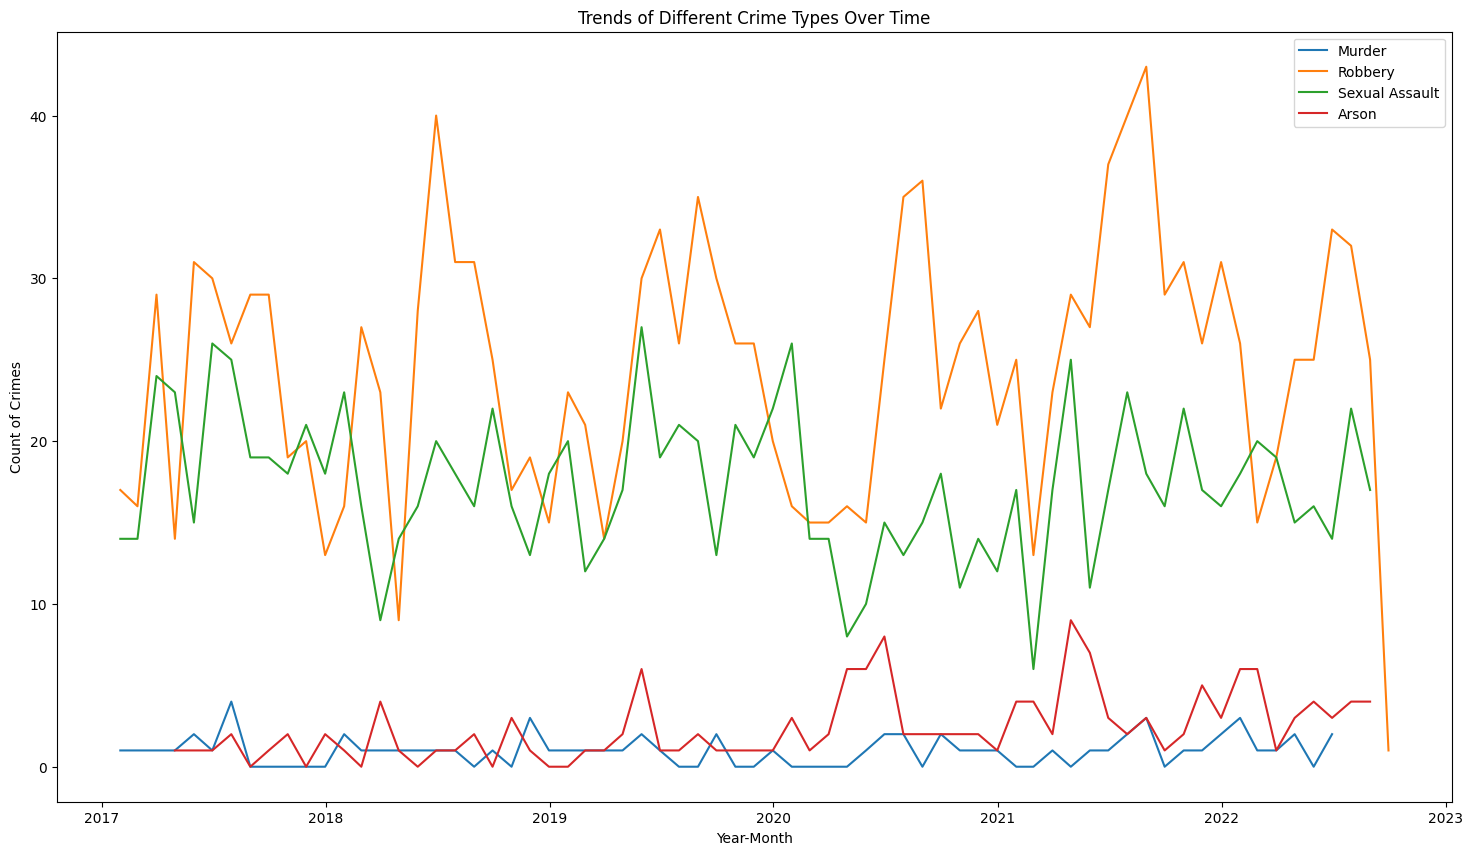

In [157]:
# Plot the time series data
plt.figure(figsize=(18,10))
plt.plot(df_murder['incident_id'], label='Murder')
plt.plot(df_robbery['incident_id'], label='Robbery')
plt.plot(df_sexual_assault['incident_id'], label='Sexual Assault')
plt.plot(df_arson['incident_id'], label='Arson')
plt.xlabel('Year-Month')
plt.ylabel('Count of Crimes')
plt.title('Trends of Different Crime Types Over Time')
plt.legend(loc='best')
plt.show()